# Primena diskretne Furijeove transformacije

[<span style="font-size:1.2em;"><b>Digitalna obrada signala</b></span>](http://tnt.etf.rs/~oe3dos)<span style="font-size:1.2em;">, Vladimir Petrović</span>

U ovom _notebook_-u ćemo primeniti DFT u izračunavanju konvolucije dva signala i u dodatnim primerima frekvencijske analize signala.

In [1]:
USE_WIDGETS = True

def importEssentialLibs(USE_WIDGETS):
    import numpy as np
    if USE_WIDGETS:
        %matplotlib widget
    else:
        %matplotlib inline
    import matplotlib as mpl
    mpl.rc('text', usetex = True)
    mpl.rc('font', family = 'serif', size = 18)
    import matplotlib.pyplot as plt
    import scipy.signal as signal
    
    return np, mpl, plt, signal

## Brzo izračunavanje konvolucije
### Periodična konvolucija periodičnih signala
Ranije smo videli da se konvolucija aperiodičnih signala može izračunati odbirak po odbirak korišćenjem sume:

$$
y[n] = (x*h)[n] = \sum_{m=-\infty}^{+\infty} x[m]h[n-m].
$$

Međutim, ovakva formulacija je neupotrebljiva za periodične signale jer je njihova dužina beskonačna, pa bi konvoluciona suma mogla da divergira. Zbog toga se za periodične signale definiše periodična konvolucija o kojoj će biti reči u ovom odeljku. 

Kod periodičnih signala $\overset{\sim}{x}[n]$ smo mogli lako definisati razvoj u Furijeov red:

$$
X[k] = \frac{1}{N} \sum_{n=n_0}^{n_0 + N - 1} \overset{\sim}{x}[n]e^{-j k \Omega_0 n}. 
$$

Neka je $X_1[k]$ Furijeov red signala $\overset{\sim}{x_1}[n]$ i $X_2[k]$ Furijeov red signala $\overset{\sim}{x_2}[n]$ i neka su signali $\overset{\sim}{x_1}[n]$ i $\overset{\sim}{x_2}[n]$ periodični sa istim osnovnim periodom. Neka je  $Y[k] = X_1[k]X_2[k]$ Furijeov red signala $\overset{\sim}{y}[n]$. Tada je signal $\overset{\sim}{y}[n]$:

\begin{align*}
\overset{\sim}{y}[n] 
&= \sum_{k=\langle N \rangle} X_1[k]X_2[k] e^{j k \Omega_0 n} \\
&= \sum_{k=\langle N \rangle} \left( \frac{1}{N} \sum_{m=n_0}^{n_0 + N - 1} \overset{\sim}{x_1}[m]e^{-j k \Omega_0 m} \right) X_2[k] e^{j k \Omega_0 n} \\
&= \frac{1}{N} \sum_{m=n_0}^{n_0 + N - 1} \overset{\sim}{x_1}[m] \sum_{k=\langle N \rangle} X_2[k] e^{j k \Omega_0 (n-m)} \\
&= \frac{1}{N} \sum_{m=n_0}^{n_0 + N - 1} \overset{\sim}{x_1}[m] \overset{\sim}{x_2}[n-m]
\end{align*}

Izraz $\sum_{m=n_0}^{n_0 + N - 1} \overset{\sim}{x_1}[m] \overset{\sim}{x_2}[n-m]$ nazivamo periodičnom konvolucijom. Iz prethodne analize zaključujemo da periodičnoj konvoluciji dva signala u vremenskom domenu odgovara proizvod koeficijenata Furijeovog reda pomnožen periodom $N$.


### Cirkularna konvolucija

Ranije smo videli da su koeficijenti diskretne Furijeove transformacije signala $x[n]$ isti kao i koeficijenti Furijeovog reda periodičnog produženja signala $x[n]$, $x_p[n]$, samo pomnoženi periodom $N$. Ovo navodi na zaključak i da će proizvod DFT koeficijenata dva signala dati nešto slično periodičnoj konvoluciji periodičnih produženja ta dva signala u vremenskom domenu. Nađimo inverznu diskretnu Furijeovu transformaciju proizvoda koeficijenata DFT-a dve sekvence:

\begin{align*}
y[n] 
&= \frac{1}{N} \sum_{k=0}^{N-1} X_1[k]X_2[k] e^{j k \frac{2\pi}{N} n} 
= \frac{1}{N} \sum_{k=0}^{N-1} \left(\sum_{m=0}^{N-1} x_1[m]e^{-j k \frac{2\pi}{N} m} \right)X_2[k] e^{j k \frac{2\pi}{N} n} \\
&= \frac{1}{N} \sum_{m=0}^{N-1} x_1[m] \sum_{k=0}^{N-1} X_2[k]  e^{j k \frac{2\pi}{N} (n-m)} 
= \frac{1}{N} \sum_{m=0}^{N-1} x_1[m] \sum_{k=0}^{N-1} NX_{p2}[k]  e^{j k \frac{2\pi}{N} (n-m)} \\
&= \sum_{m=0}^{N-1} x_1[m] \sum_{k=0}^{N-1} X_{p2}[k]  e^{j k \frac{2\pi}{N} (n-m)} 
= \sum_{m=0}^{N-1} x_1[m] x_{p2}[n-m] = \sum_{m=0}^{N-1} x_1[m] x_2\langle n-m \rangle_N\\
\end{align*}

gde su sa $X_{p2}[k]$ označeni koeficijenti Furijeovog reda periodičnog produženja signala $x_2[n]$. Sa $x\langle n-m \rangle_N$ označen cirkularni pomeraj sekvence konačne dužine $x[n]$. Na jednom periodu, ovaj pomeraj je ekvivalentan linearnom pomeraju periodičnog produženja te sekvence. Izraz  $\sum_{m=0}^{N - 1} x_1[m] x_2\langle n-m \rangle_N = x_1[n] \otimes x_2[n]$ nazivamo __cirkularnom__ konvolucijom dva signala. 

### Linearna konvolucija uz pomoć DFT-a
S obzirom na to da je diskretnu Furijeovu transformaciju moguće izračunati izuzetno brzo, postavlja se pitanje da li je moguće iskoristiti je za izračunavanje linearne konvolucije. Poznato je da će konvolucija dva signala u vremenskom domenu, u frekvencijskom domenu (Furijeovoj transformaciji) dati proizvod Furijeovih transformacija pojedinačnih signala:

$$
\mathcal{F} \left\lbrace x[n] * h[n] \right\rbrace (e^{j \Omega}) = X(e^{j \Omega})H(e^{j \Omega}).
$$

Posmatrajući ovaj izraz lako je zaključiti da je konvolucija dva signala
$$
x[n] * h[n] = \mathcal{F}^{-1} \left\lbrace X(e^{j \Omega})H(e^{j \Omega})  \right\rbrace.
$$

Međutim, kao što smo videli, ovo ne važi za diskretnu Furijeovu transformaciju u opštem slučaju. Rezultat inverzne DFT proizvoda koeficijenata DFT-a dva signala je cirkularna konvolucija. DFT se može iskoristiti za izračunavanje linearne konvolucije samo onda ako je linearna konvolucija jednaka cirkularnoj. 
$$
\sum_{m=0}^{N - 1} x_1[m] x_2\langle n-m \rangle_N = x_1[n] \otimes x_2[n] \overset{?}{=} x_1[n] * x_2[n] = \sum_{m=0}^{N - 1} x_1[m] x_2[n-m]
$$

Posmatrajući izraze za linearnu i cirkularnu konvoluciju možemo zaključiti da su oni jednaki samo onda kada proizvod dva signala od kojih je jedan cirkularno pomeren daje isti rezultat kao proizvod dva signala gde je jedan linearno pomeren. Ovo se može postići jedino dopunjavanjem nulama. Na kraju, postavlja se pitanje koliko je nula potrebno dopuniti. S obzirom na to da je dužina konvolucije $N_y = N_x + N_h - 1$, gde su $N_x$ i $N_h$ dužine signala koji se konvoluiraju, onda je jasno da broj koeficijenata DFT-a iz kojih se inverznom transformacijom dobija signal dužine $N_y$ mora biti baš $N_y$. Zbog toga se ulazne sekvence dopunjavaju nulama do dužine $N_y$.  

Convolution using DFT, time passed: 0.0009829998016357422 seconds.
Convolution using direct method, time passed: 0.00012755393981933594 seconds.
[ 3.60822483e-16  4.44089210e-16  8.88178420e-16  4.44089210e-16
  4.44089210e-16  4.44089210e-16  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
 -8.88178420e-16 -8.88178420e-16 -1.77635684e-15  0.00000000e+00
 -4.44089210e-16 -4.44089210e-16  2.22044605e-16  8.88178420e-16
  2.22044605e-16  7.21644966e-16  9.43689571e-16  7.49400542e-16]


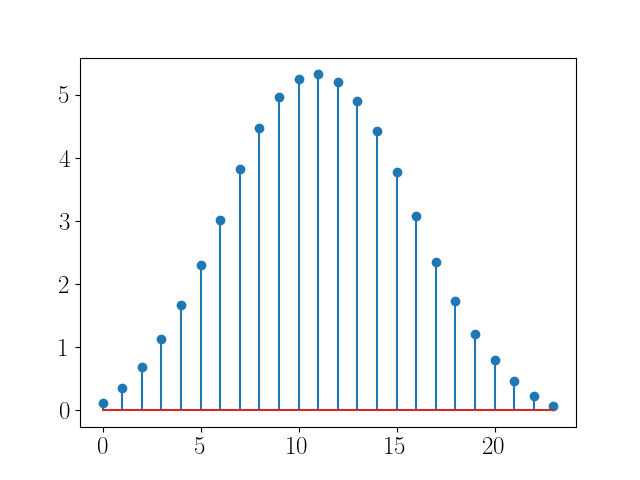

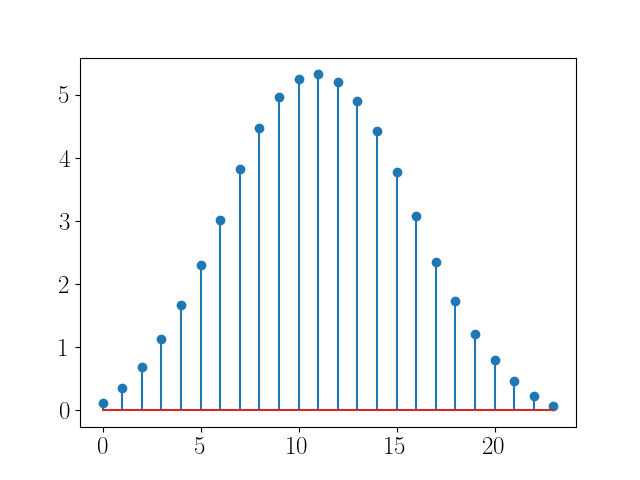

In [2]:
np, mpl, plt, signal = importEssentialLibs(USE_WIDGETS)
import scipy.fft as fft
import time

doPlot = True
Nx = 10 #100000
Nh = 15 #150000
# test it:
# ramp signals
x = np.exp(-0.05*np.linspace(1, Nx, Nx))
h = signal.triang(Nh)

# Calculate using DFT
Ny = Nx + Nh - 1
t = time.time()
y = fft.ifft(fft.fft(x, Ny)*fft.fft(h, Ny)).real
# We can use scipy built in function
#y = signal.fftconvolve(x, h)
print(f'Convolution using DFT, time passed: {time.time() - t} seconds.')

if doPlot:
    fig, ax = plt.subplots()
    plt.stem(y)

# calculate using signal.convolve
t = time.time()
ys = signal.convolve(x, h, method='direct')
print(f'Convolution using direct method, time passed: {time.time() - t} seconds.')
if doPlot:
    fig, ax = plt.subplots()
    plt.stem(ys)

# compare results
print(y - ys)

## Frekvencijska analiza nestacionarnih signala
Do sada smo frekvencijsku analizu radili nad signalima konačnog trajanja koji nisu menjali frekvencijske komponente u vremenu. Učitajmo jedan signal kod koga ovo nije slučaj i nacrtajmo spektar ovog signala.

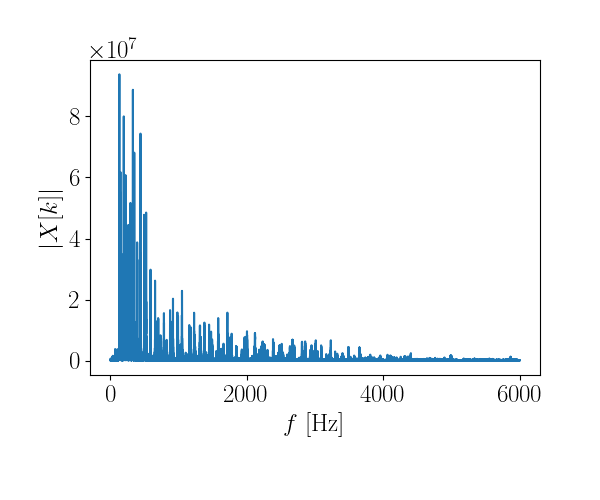

In [3]:
np, mpl, plt, signal = importEssentialLibs(USE_WIDGETS)
import scipy.fft as fft
import IPython
from scipy.io import wavfile

fs, x = wavfile.read("audio/skala.wav")
IPython.display.display(IPython.display.Audio(x, rate = fs))

fMaxShow = 6000

N = len(x)
X = fft.fft(x)

Nmax = fMaxShow*N//fs
f = fs*np.arange(Nmax)/N

# only part of the spectra
X = X[:len(f)];

fig = plt.figure(figsize = [6, 5])
plt.plot(f, abs(X))
plt.subplots_adjust(bottom=0.25, left=0.15)
plt.xlabel(r'$f$ [Hz]')
plt.ylabel(r'$|X[k]|$');


Kao što vidimo, iz spektra se može malo šta zaključiti. Sve frekvencijske komponente su pomešane i nemoguće je razlučiti kada su pojedine frekvencijske komponente nastale i nestale. Zbog toga se u ovakvim primerima signal mora izdeliti na signale manjeg trajanja, a zatim ispitati frekvencijski sadržaj pojedinačnih delova. Na ovaj način se može dobiti onoliko vektora DFT-a koliko je delova signala. Ti vektori se mogu složiti u matricu, a onda se ta matrica može prikazati kao slika. Tako dobijena slika se naziva __spektrogram__. 

Spektrogram se lako može dobiti korišćenjem ugrađene funkcije iz paketa _Scipy_: [signal.spectrogram()](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.spectrogram.html). Ova funkcija vraća podatke o vremenskim trenucima, učestanostima i vrednostima spektra u tim vremenskim trenucima i na tim učestanostima. Da bi se spektrogram prikazao, najjednostavnije je koristiti funkciju [pcolormesh()](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.pcolormesh.html). Međutim ova funkcija može da bude izuzetno spora ako se koristi za crtanje velikih matrica. Kao obilazno rešenje se može koristiti funkcija [matshow()](https://matplotlib.org/3.3.3/api/_as_gen/matplotlib.pyplot.matshow.html) ili [imshow()](https://matplotlib.org/3.3.3/api/_as_gen/matplotlib.pyplot.imshow.html). Ove funkcije su malo komplikovanije za korišćenje kada se koriste za crtanje spektrograma. Zbog toga se posle crtanja spektra mora podesiti odnos širine i visine slike. U narednim primerima se za to koristi funkcija ```forceAspect()``` definisana u narednoj ćeliji. Prilikom pozivanja funkcija ```matshow()``` ili ```imshow()``` moraju definisati ključne tačke za obeležavanje osa. To se postiže podešavanjem parametra ```extent```. Takođe, podrazumevano je da je koordinatni početak u gornjem levom uglu, s obzirom na to da se ove funkcije najčešće koriste za prikaz slika. Ako želimo da koordinatni početak bude u donjem levom uglu, moramo podesiti i parametar ```origin``` na vrednost ```'lower'```. 

In [4]:
def forceAspect(ax, aspect=1):
    im = ax.get_images()
    extent =  im[0].get_extent()
    
    
    ax.set_aspect(abs((extent[1]-extent[0])/(extent[3]-extent[2]))/aspect)

Nacrtajmo sada spektrogram signala iz prethodnog primera.

981570


/tmp/ipykernel_2549/3854047027.py:33: RuntimeWarning: divide by zero encountered in log10
  axs[1].matshow(20*np.log10(abs(Sxx[:][:fMaxIndex])), extent=[min(t), max(t), min(f), fMaxShow], origin='lower')


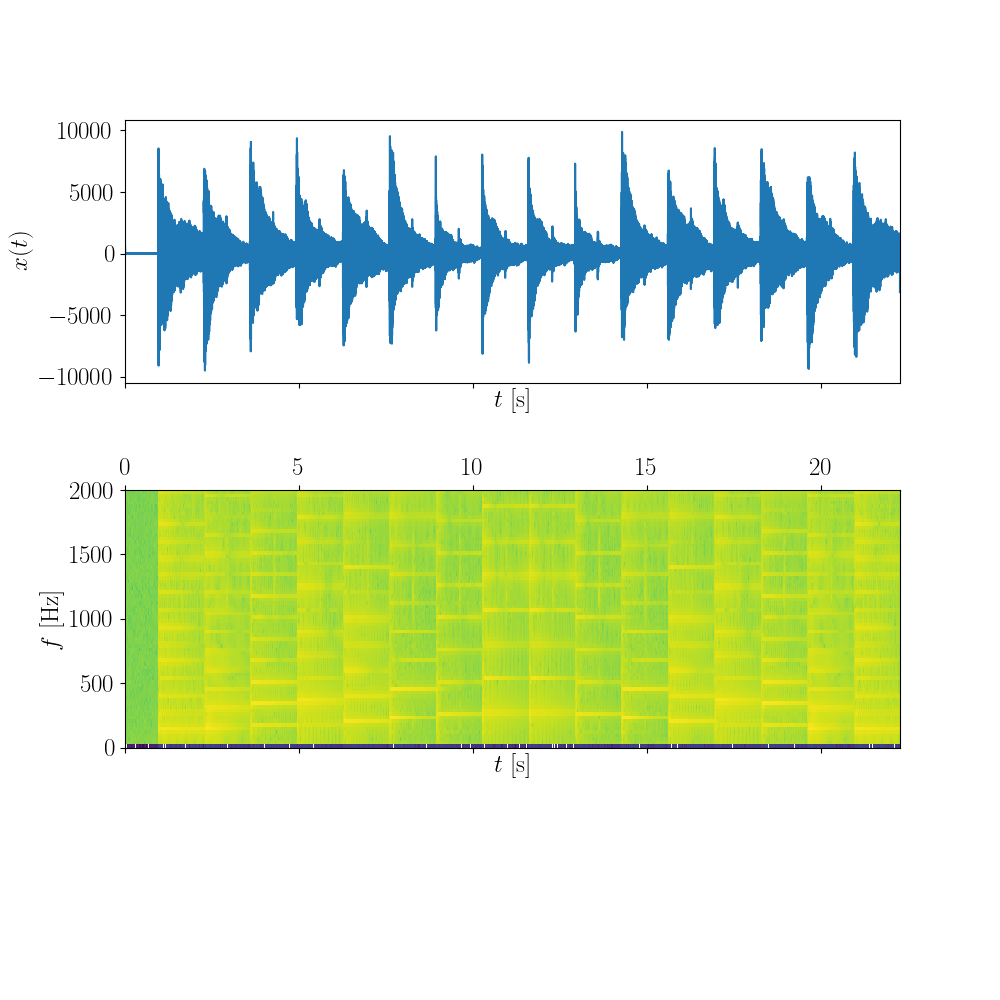

In [17]:
np, mpl, plt, signal = importEssentialLibs(USE_WIDGETS)
import scipy.fft as fft
import IPython
from scipy.io import wavfile

fs, x = wavfile.read("audio/skala.wav")
print(len(x))
IPython.display.display(IPython.display.Audio(x, rate = fs))

t = np.arange(len(x))/fs
fig, axs = plt.subplots(2, 1, figsize = [10,10], sharex=True)
plt.subplots_adjust(bottom=0.25, hspace = 0.4)

axs[0].plot(t, x)
axs[0].set_xlabel('$t$ [s]')
axs[0].set_ylabel('$x(t)$')
axs[0].set_xlim([0, max(t)])

fMaxShow = 2000

Nwin =  1600;
window = signal.boxcar(Nwin) #Try hamming
NFFT = Nwin

f, t, Sxx = signal.spectrogram(x, fs = fs, window=window, noverlap=Nwin//4, nfft=NFFT, return_onesided=True, 
                               scaling='spectrum', mode='complex')
fMaxIndex = NFFT*fMaxShow//fs

# Za crtanje spektrograma koristimo pclormesh ili matshow u kombinaciji sa forceAspect, treba otkomentarisati jednu od sledeće tri opcije

#axs[1].pcolormesh(t, f[:fMaxIndex], 20*np.log10(abs(Sxx[:][:fMaxIndex])), shading = 'nearest')# try shading='gouraud')

axs[1].matshow(20*np.log10(abs(Sxx[:][:fMaxIndex])), extent=[min(t), max(t), min(f), fMaxShow], origin='lower')
forceAspect(axs[1], 3)

# Dodatno, možemo obrnuti smer y ose ako u vektoru extent zamenimo učestanosti i parametru origin ne postavimo vrednost na 'lower'
#axs[1].matshow(20*np.log10(abs(Sxx[:][:fMaxIndex])), extent=[min(t), max(t), fMaxShow, min(f)])
#forceAspect(axs[1], 3)

# Obeležavanje osa
axs[1].set_xlabel('$t$ [s]')
axs[1].set_ylabel('$f$ [Hz]');

Primećujemo da je sada moguće uočiti da tonovi muzičkog signala postaju sve viši i viši do sredine trajanja signala, a zatim postaju sve niži i niži. Pokažimo još jedan primer, ovoga puta govornog signala:

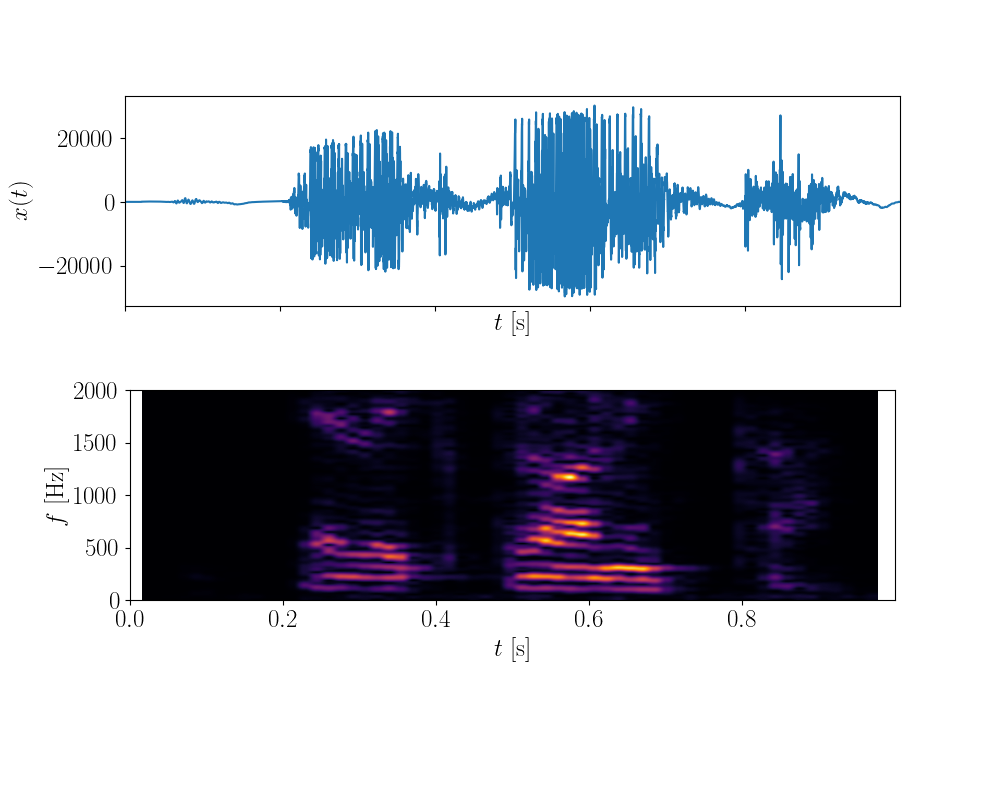

In [12]:
np, mpl, plt, signal = importEssentialLibs(USE_WIDGETS)
import scipy.fft as fft
import IPython
from scipy.io import wavfile

fs, x = wavfile.read("audio/govor_elektronika.wav")
IPython.display.display(IPython.display.Audio(x, rate = fs))

t = np.arange(len(x))/fs
fig, axs = plt.subplots(2, 1, figsize = [10, 8], sharex=True)
plt.subplots_adjust(bottom=0.25, hspace = 0.4)
axs[0].plot(t, x)
axs[0].set_xlabel('$t$ [s]')
axs[0].set_ylabel('$x(t)$')
axs[0].set_xlim([0, max(t)])

fMaxShow = 2000

NFFT = 1024
Nwin = 256
window = signal.hamming(Nwin, sym = False)

f, t, Sxx = signal.spectrogram(x, fs = fs, window=window, noverlap=Nwin//2, nfft=NFFT, return_onesided=True, 
                               scaling='spectrum', mode='complex')
fMaxIndex = NFFT*fMaxShow//fs
#axs[1].pcolormesh(t, f[:fMaxIndex], abs(Sxx[:][:fMaxIndex]), cmap = 'inferno', shading = 'nearest');
axs[1].imshow(abs(Sxx[:][:fMaxIndex]), extent=[min(t), max(t), min(f), fMaxShow], origin = 'lower', cmap = 'inferno')
forceAspect(axs[1], 3.5)
axs[1].set_xlabel('$t$ [s]')
axs[1].set_ylabel('$f$ [Hz]');


Više o različitim mapama boja možete naći [ovde](https://matplotlib.org/tutorials/colors/colormaps.html).